Marco Zenari

ID number: 2097012



# Character Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
seed=2097012
np.random.seed(seed)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 67 53 70 54 61 60 64 52 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 67 53 70 54 61 60 64 52 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


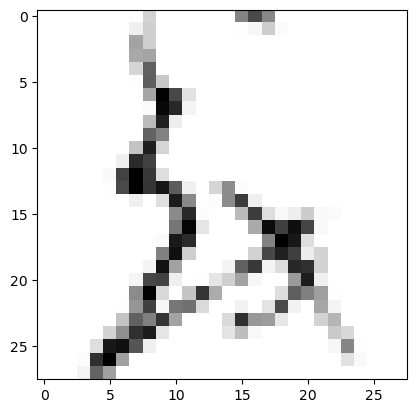

LABEL: 9
INPUT:


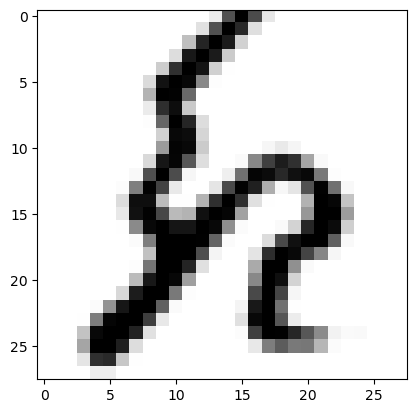

LABEL: 1
INPUT:


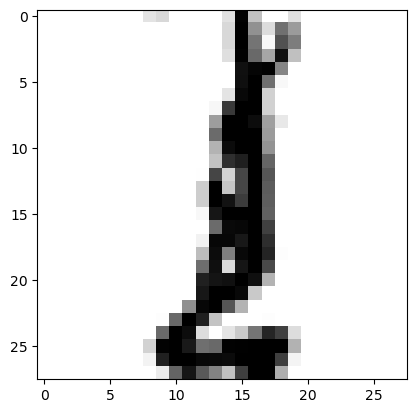

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=seed,
                    learning_rate_init=.1)

#I've changed the number of maximum interations to 1000 beacause with 100 iterations the algorithm does not converge

clf= GridSearchCV(mlp, parameters, cv = 5, n_jobs=-1)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
means=clf.cv_results_['mean_test_score']
print(means)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.745

All scores on the grid:
[0.65333333 0.73666667 0.745      0.69       0.69833333]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

best_mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=seed,
                    learning_rate_init=.1, hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'])

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

clf_batch=GridSearchCV(best_mlp, parameters, cv=kf, n_jobs=-1)
clf_batch.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf_batch.best_params_)

print("Score with best parameters:")
print(clf_batch.best_score_)
print("\nAll scores on the grid:")
means=clf_batch.cv_results_['mean_test_score']
print(means)


RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}
Score with best parameters:
0.7516666666666667

All scores on the grid:
[0.115      0.75166667 0.73      ]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

The best results with the suggested parameters are the one obtained with the architectures (20), (40) and (20,20). In particular the architecture with 40 neurons in 1 hidden layers works better than the one with 20 neurons in 1 layer and also then the architecture with 2 layers of 20 neurons. I tried also the architecture with 2 layers of 40 neurons but the results are very similar (slighty worse) than the (40,) architecture. Using this architecture we obtain the best results with the batch size 32, even though also the batch size 480 gives good results. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 2.34 sec

Training MLP of size (20,) ...
Done, training time: 1.01 sec

Training MLP of size (40,) ...
Done, training time: 1.10 sec

Training MLP of size (20, 20) ...
Done, training time: 1.16 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.34 sec



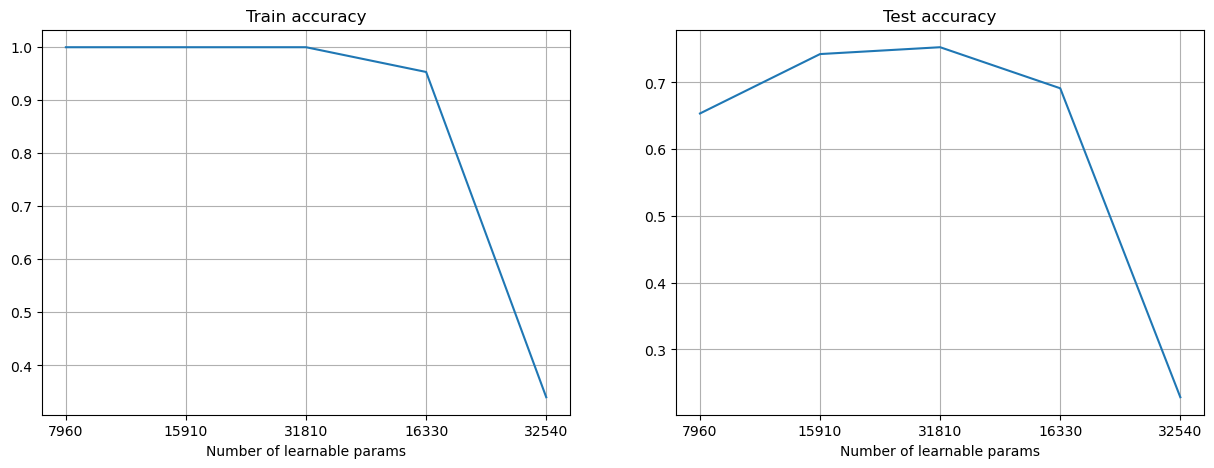

In [10]:
seed=309257
np.random.seed(seed)

import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', batch_size=32,
                    tol=1e-4, random_state=seed,
                    learning_rate_init=.1, hidden_layer_sizes=hl_size)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

In the case of the first 3 architectures the performance on the training set is perfect, suggetsting an overfittig. On the test the best accuracy is obtained with the third architecture (40,) while the other architectures give worse results. The other two architectures (20,20,) and (40,20,10,) do not overfit the training set but perform poorly on the test set.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/home/zenn/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zenn/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


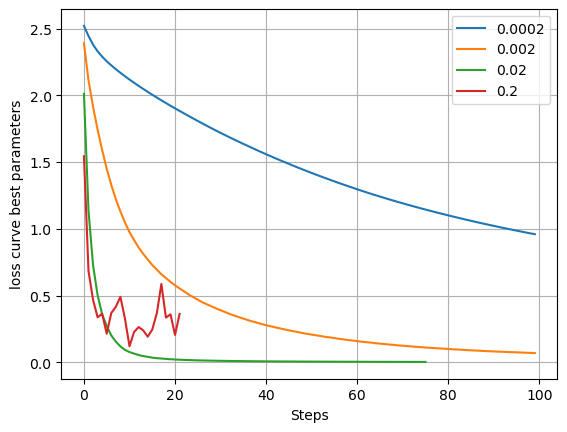

RESULTS FOR NN

Best parameters set found:
0.02
Score with best parameters:
0.752


In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = []
train_list=[]
test_acc_list=[]


#ADD YOUR CODE
for lr in lr_list:
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', batch_size=32, 
                    tol=1e-4, random_state=seed, learning_rate_init=lr, hidden_layer_sizes=(40,))
    mlp.fit(X_train, y_train)
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test)) 
    scores.append(mlp.score(X_test, y_test))
    plt.plot(range(0, len(mlp.loss_curve_)), mlp.loss_curve_, label=f'{lr}')
    
    
plt.xlabel('Steps')
plt.grid()
plt.ylabel('loss curve best parameters')    
plt.legend()
plt.show()
print('RESULTS FOR NN\n')

print("Best parameters set found:")
print(lr_list[test_acc_list.index(max(test_acc_list))])


print("Score with best parameters:")
print(scores[test_acc_list.index(max(test_acc_list))])


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The best parameter is lr=0.02 and from the figure we can see that the loss curve for this parameter converges to zero faster than the others and in a stable way. The parameter lr=0.2 is faster in the first steps, but it is unstable and does not converge. The other parameters does not converge with 100 iterations.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.248000


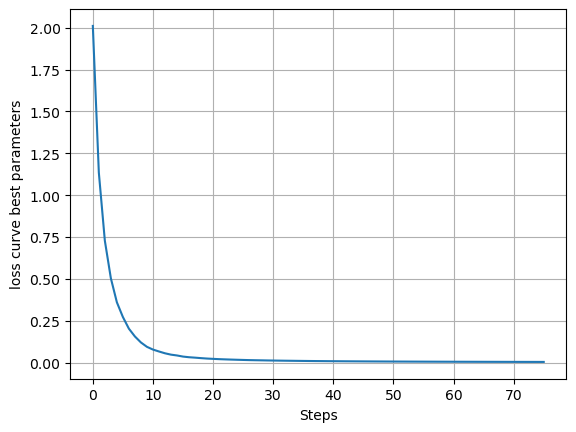

In [12]:
#get training and test error for the best NN model from CV
best_mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', batch_size=32, 
                    tol=1e-4, random_state=seed, learning_rate_init=0.02, hidden_layer_sizes=(40,))
best_mlp.fit(X_train, y_train)
training_error=1-best_mlp.score(X_train, y_train)
test_error=1-best_mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


plt.plot(range(0, len(best_mlp.loss_curve_)), best_mlp.loss_curve_)
plt.xlabel('Steps')
plt.grid()
plt.ylabel('loss curve best parameters')
plt.show()


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [404 413 423 429 398 386 389 382 397 379]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

best_mlp2 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', batch_size=32, 
                    tol=1e-4, random_state=seed, learning_rate_init=0.02, hidden_layer_sizes=(40,), verbose=True)
best_mlp2.fit(X_train, y_train)
training_error=1-best_mlp2.score(X_train, y_train)
test_error=1-best_mlp2.score(X_test, y_test)


print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error=1-best_mlp2.score(X_train, y_train)
test_error=1-best_mlp2.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.08537300
Iteration 2, loss = 0.56547102
Iteration 3, loss = 0.43581392
Iteration 4, loss = 0.34378513
Iteration 5, loss = 0.27414975
Iteration 6, loss = 0.21769884
Iteration 7, loss = 0.17654427
Iteration 8, loss = 0.13392681
Iteration 9, loss = 0.10773244
Iteration 10, loss = 0.08406585
Iteration 11, loss = 0.06825804
Iteration 12, loss = 0.05387551
Iteration 13, loss = 0.04358000
Iteration 14, loss = 0.03468552
Iteration 15, loss = 0.02880897
Iteration 16, loss = 0.02463729
Iteration 17, loss = 0.02129706
Iteration 18, loss = 0.01849065
Iteration 19, loss = 0.01629141
Iteration 20, loss = 0.01478388
Iteration 21, loss = 0.01305717
Iteration 22, loss = 0.01195794
Iteration 23, loss = 0.01105591
Iteration 24, loss = 0.01012161
Iteration 25, loss = 0.00956506
Iteration 26, loss = 0.00886917
Iteration 27, loss = 0.00828092
Iteration 28, loss = 0.00782262
Iteration 29, loss = 0.00737001
Iteration 30, loss = 0.00704454
Iteration 31, loss = 0.00675496
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

As expected using more data to train the NN leads us to better results, as the error on the test set is 0.25 with 600 data points and 0.14 with 4000 data points.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

[1 0 1 4 9 1 4 0 3 3]
[1 0 2 4 9 1 4 0 3 3]
[1 0 2 4 2 1 9 0 3 3]
9 9 2
y_test
INPUT:


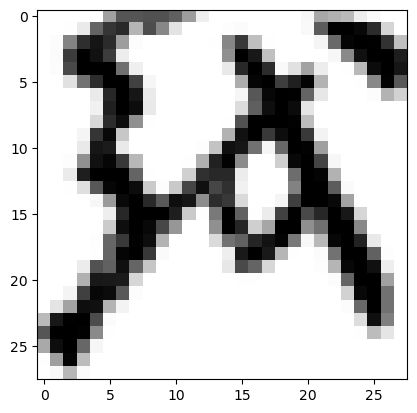

LABEL: 9
long_NN_prediction
INPUT:


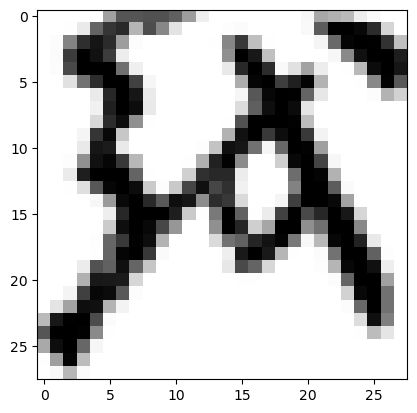

LABEL: 9
NN_prediction
INPUT:


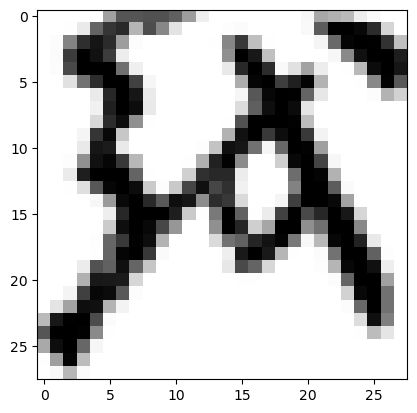

LABEL: 2


In [15]:
NN_prediction = best_mlp.predict(X_test)
large_NN_prediction = best_mlp2.predict(X_test)

print(y_test[0:10])
print(large_NN_prediction[0:10])
print(NN_prediction[0:10])

index=4 # index at which the NN misclassifies while NN_large classifies correctly

print(y_test[index], large_NN_prediction[index], NN_prediction[index])

print('y_test')
plot_input(X_test, y_test, 4)

print('long_NN_prediction')
plot_input(X_test, large_NN_prediction, 4)


print('NN_prediction')
plot_input(X_test, NN_prediction, 4)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


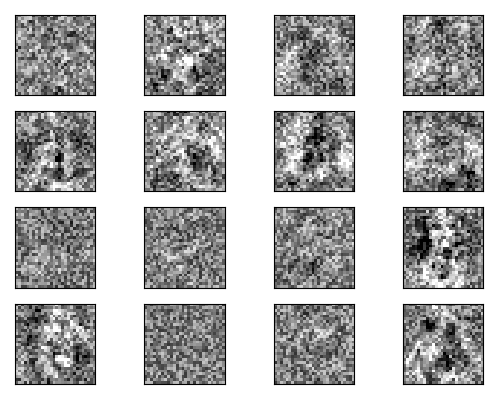

Weights with 4000 data points:


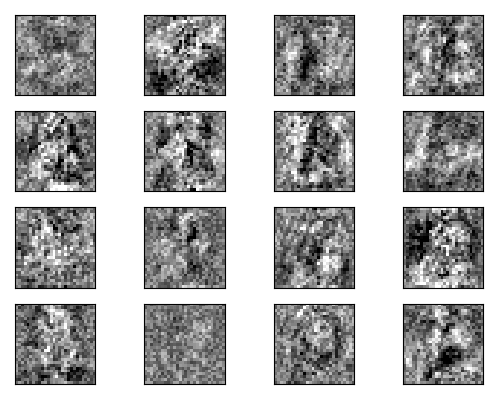

In [16]:
print("Weights with 600 data points:")

mlp=best_mlp
mlp_large=best_mlp2

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

In the case of 600 data points some weight matrices appear not to contain a lot of informations (like if some of them are just "noise") while in the case of 4000 data points there appear to be more structures in the matrices, probably because having more data for the training makes more neuron learn.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_svc=SVC(kernel='rbf', degree=2, C=10, gamma=0.01)

best_svc.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error =1. - best_svc.score(X_train,y_train)
print("Training score SVM:")
print(SVM_training_error)

SVM_test_error =1. - best_svc.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.0716


In [18]:
from sklearn import linear_model

regL2 =linear_model.LogisticRegression(C=1, max_iter=500)
regL2.fit(X_train, y_train)

print(clf.best_params_)

{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1. - regL2.score(X_train,y_train)
test_error =  1. - regL2.score(X_test,y_test)


print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)

{'hidden_layer_sizes': (40,)}

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.034000
Test error (reg): 0.247400


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The SVM achieves the best results with a lower test error. The NN performs better than the logistic regression.

## QUESTION 7

What are the different ways in which you can improve the results obtained for NN? List and justify some of them.

##### [ANSWER TO QUESTION 7]

-We could use more data for the training, as in the notebook we have shown that the NN with 4000 data point in the training set works better than the NN with 600 data points in the training set.

-We could also find a different architecture that by trial and error gives better results.